In [1]:
from matplotlib import pyplot as plt
import cv2 as cv
import skimage.morphology as morph
import numpy as np
from skimage import io

In [2]:
def mask(front, back):
    #CONVERT FOREGROUND IMAGE FROM BGR TO RGB
    front = cv.cvtColor(front, cv.COLOR_BGR2RGB)
    #CONVERT BACKGROUND IMAGE FROM BGR TO RGB
    back = cv.cvtColor(back, cv.COLOR_BGR2RGB)
    
    #RESIZE BACKGROUND IMAGE TO MATCH FOREGROUND IMAGE DIMENSIONS
    back = cv.resize(back,(front.shape[1],front.shape[0]))
    
    #BLUR THE BACKGROUND IMAGE AND CONVERT TO FLOAT
    back = cv.GaussianBlur(back, (9,9), 0)
    back = back.astype('double')
    
    #CONVERT FOREGROUND FROM RGB TO GRAY AND THRESHOLD
    gray = cv.cvtColor(front, cv.COLOR_RGB2GRAY)
    _, threshed = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV)
    #CONVERT THRESHOLDED IMAGE TO A DOUBLE
    threshed = threshed.astype('double')
    
    #CREATE SQUARE 5*5 SE AND PEFORM BINARY DILATION ON THRESHED
    se2 = morph.square(5)
    img7_1 = morph.binary_dilation(threshed, se2)
    
    #CONVERT DILATED OUTPUT TO UINT8 AND FIND CONTOURS OF IMAGE
    img7_1 = img7_1.astype('uint8')
    conts, h = cv.findContours(img7_1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    #DRAW THE CONTOURS OF THE IMAGE
    img = cv.drawContours(img7_1, conts, -1, 255, 2)
    
    #CREATE AN EMPTY MASK OF IMAGE WITH PADDING
    h1, w1 = img.shape[:2]
    mask_empty = np.zeros((h1+2, w1+2), np.uint8)
    
    #USE FLOODFILL TO CREATE TWO SEPARATE REGIONS
    cv.floodFill(img, mask_empty, (0,0), 255);

    #INVERT IMAGE TO GET DESIRED MASK
    img2 = ~img
    
    return front, back, img2

In [3]:
def background_replacement(front, back, img2):
    #CONVERT MASK TO DOUBLE
    img7_2 = img2.astype('double')
    
    #CREATE COPY OF MASK
    img7_3 = img7_2.copy()
    
    #CHANGE ALL VALUES THAT ARE NOT 0 TO A 1
    for x in range(img7_3.shape[0]):
        for y in range(img7_3.shape[1]):
            if img7_3[x][y] != 0:
                img7_3[x][y] = 1
    
    label_colors = np.array([(0, 0, 0), (192, 128, 128)])
    
    #CREATE EMPTY MATRICES WITH DIMENSIONS OF THE MASK
    r1 = np.zeros_like(img7_2).astype(np.uint8)
    g1 = np.zeros_like(img7_2).astype(np.uint8)
    b1 = np.zeros_like(img7_2).astype(np.uint8)
     
    #FILL MATRICES TO REPRESENT RGB LAYERS THEN STACK THE LAYERS
    for x in range(0, 2):
        index = img7_3 == x
        r1[index] = label_colors[x, 0]
        g1[index] = label_colors[x, 1]
        b1[index] = label_colors[x, 2]
        
    redgreenblue = np.stack([r1, g1, b1], axis=2)
    
    #Threshold the mask to get 3D mask
    _, threshed = cv.threshold(redgreenblue, 0, 255, cv.THRESH_BINARY)
    
    #BLUR THE MASK TO SOFTEN EDGES
    first = cv.GaussianBlur(threshed, (7,7),0)
    #BINARIZE THE MASK
    first = first.astype('double')/255
    #CHANGE MASK TO A FLOAT
    front = front.astype('double')
    
    #MULTIPLY MASK WITH FOREGROUND IMAGE
    front = cv.multiply(first, front) 
     
    #MULTIPLY 1-MASK WITH BACKGROUND
    back = cv.multiply(1.0 - first, back)
    #FOR OUTPUT ADD FOREGOUND TO BACKGROUND
    output = cv.add(front, back)
    output = output/255
    
    return output

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


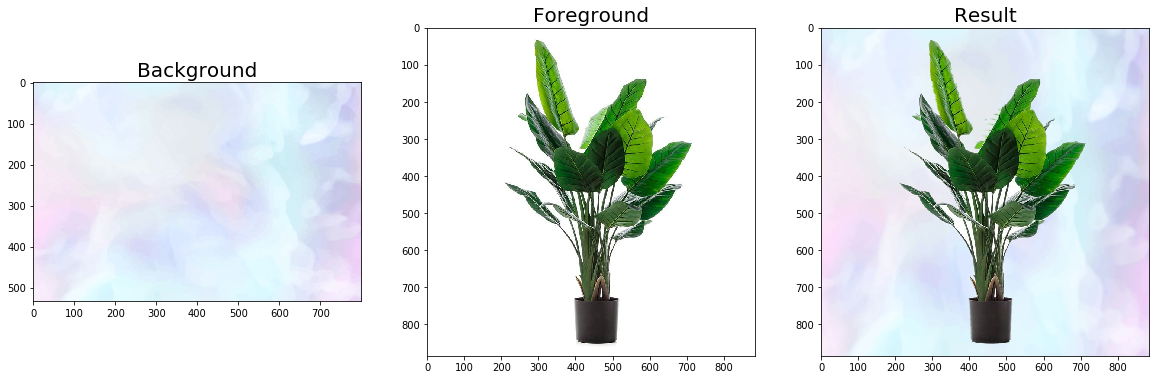

In [4]:
WHITE = [255,255,255]
#FILE PATH
front_img = "front2/plant2.jpg"
back_img = "backset/back7.jpg"
#READ IN IMAGE
front = cv.imread(front_img)
back = cv.imread(back_img)
fcopy = io.imread(front_img)
bcopy = io.imread(back_img)
front, back, img = mask(front, back)
output = background_replacement(front, back, img)

plt.figure(figsize=(20,15))
plt.subplot(131), plt.imshow(bcopy)
plt.title('Background', size=20) 

plt.subplot(132), plt.imshow(fcopy)
plt.title('Foreground', size=20)

plt.subplot(133), plt.imshow(output)
plt.title('Result', size=20)
plt.show()

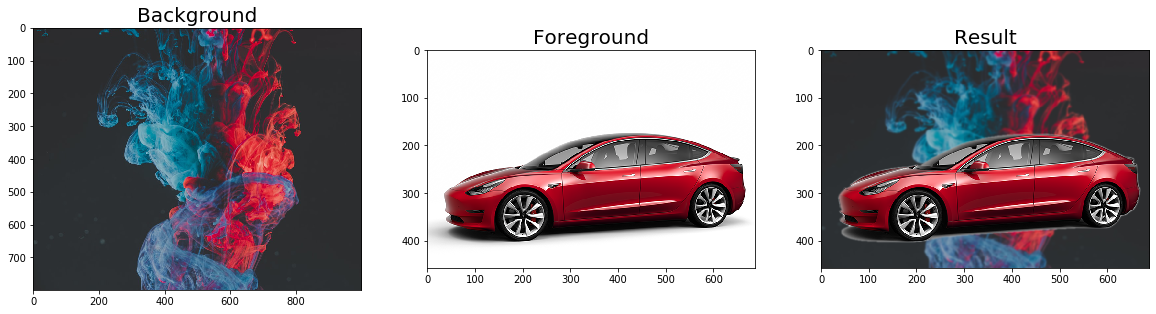

In [5]:
#FILE PATH
front_img = "front2/car3.png"
back_img = "backset/back8.jpg"
#READ IN IMAGE
front = cv.imread(front_img)
back = cv.imread(back_img)
fcopy = io.imread(front_img)
bcopy = io.imread(back_img)
front, back, img = mask(front, back)
output = background_replacement(front, back, img)

plt.figure(figsize=(20,15))
plt.subplot(131), plt.imshow(bcopy)
plt.title('Background', size=20) 

plt.subplot(132), plt.imshow(fcopy)
plt.title('Foreground', size=20)

plt.subplot(133), plt.imshow(output)
plt.title('Result', size=20)
plt.show()

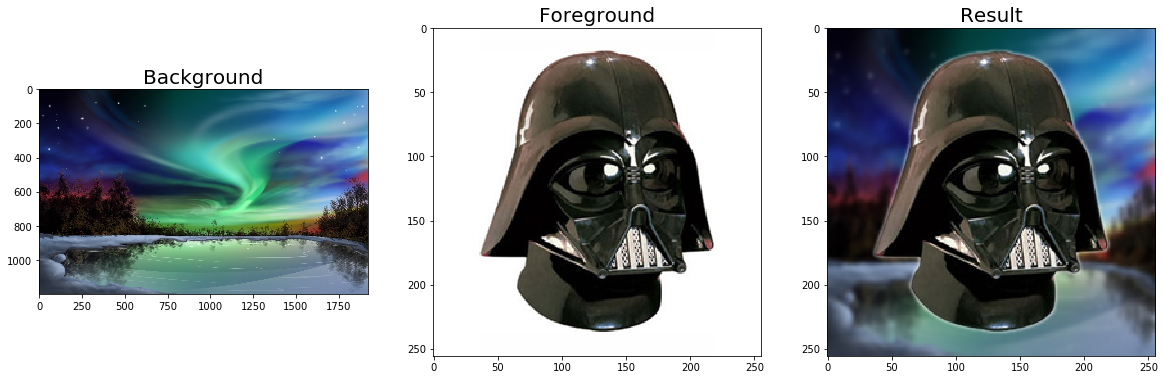

In [6]:
#FILE PATH
front_img = "front2/darkwador.jpg"
back_img = "backset/back3.jpg"
#READ IN IMAGE
front = cv.imread(front_img)
#front= cv.copyMakeBorder(front,10,10,10,10,cv.BORDER_CONSTANT,value=WHITE)
back = cv.imread(back_img)
fcopy = io.imread(front_img)
bcopy = io.imread(back_img)
front, back, img = mask(front, back)
output = background_replacement(front, back, img)

plt.figure(figsize=(20,15))
plt.subplot(131), plt.imshow(bcopy)
plt.title('Background', size=20) 

plt.subplot(132), plt.imshow(fcopy)
plt.title('Foreground', size=20)

plt.subplot(133), plt.imshow(output)
plt.title('Result', size=20)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


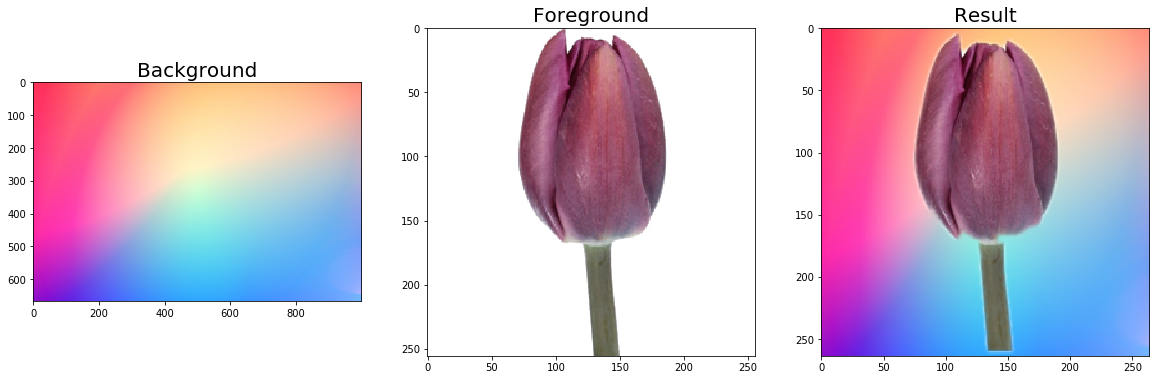

In [7]:
#FILE PATH
front_img = "front2/Aflower136.jpg"
back_img = "backset/back5.jpg"
#READ IN IMAGE
front = cv.imread(front_img)
front= cv.copyMakeBorder(front,4,4,4,4,cv.BORDER_CONSTANT,value=WHITE)
back = cv.imread(back_img)
fcopy = io.imread(front_img)
bcopy = io.imread(back_img)
front, back, img = mask(front, back)
output = background_replacement(front, back, img)

plt.figure(figsize=(20,15))
plt.subplot(131), plt.imshow(bcopy)
plt.title('Background', size=20) 

plt.subplot(132), plt.imshow(fcopy)
plt.title('Foreground', size=20)

plt.subplot(133), plt.imshow(output)
plt.title('Result', size=20)
plt.show()

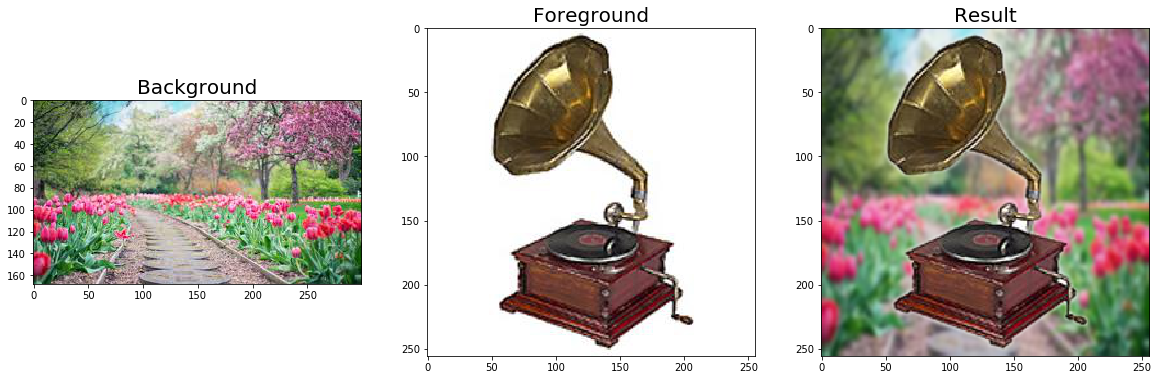

In [8]:
#FILE PATH
front_img = "front2/26451219.thl.jpg"
back_img = "backset/back.jpg"
#READ IN IMAGE
front = cv.imread(front_img)
back = cv.imread(back_img)
fcopy = io.imread(front_img)
bcopy = io.imread(back_img)
front, back, img = mask(front, back)
output = background_replacement(front, back, img)

plt.figure(figsize=(20,15))
plt.subplot(131), plt.imshow(bcopy)
plt.title('Background', size=20) 

plt.subplot(132), plt.imshow(fcopy)
plt.title('Foreground', size=20)

plt.subplot(133), plt.imshow(output)
plt.title('Result', size=20)
plt.show()

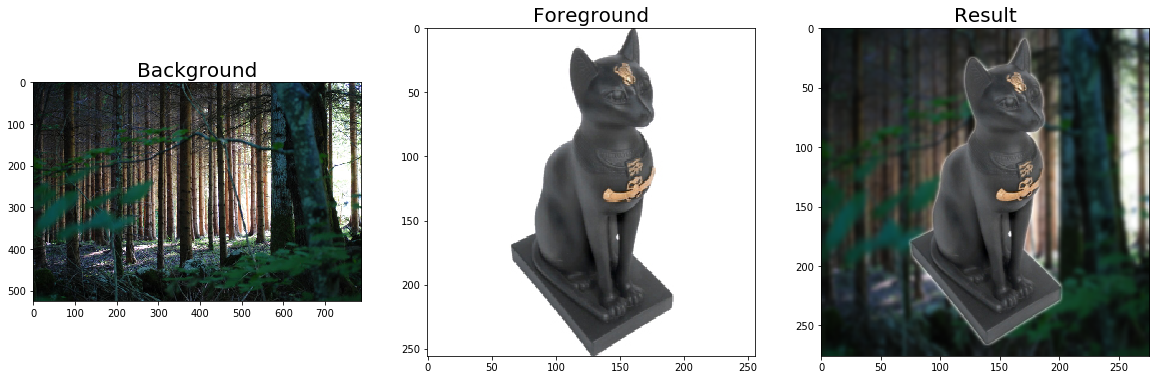

In [9]:
#FILE PATH
front_img = "front2/Acatstatue3.jpg"
back_img = "backset/forrest.jpg"
#READ IN IMAGE
front = cv.imread(front_img)
front= cv.copyMakeBorder(front,10,10,10,10,cv.BORDER_CONSTANT,value=WHITE)
back = cv.imread(back_img)
fcopy = io.imread(front_img)
bcopy = io.imread(back_img)
front, back, img = mask(front, back)
output = background_replacement(front, back, img)

plt.figure(figsize=(20,15))
plt.subplot(131), plt.imshow(bcopy)
plt.title('Background', size=20) 

plt.subplot(132), plt.imshow(fcopy)
plt.title('Foreground', size=20)

plt.subplot(133), plt.imshow(output)
plt.title('Result', size=20)
plt.show()

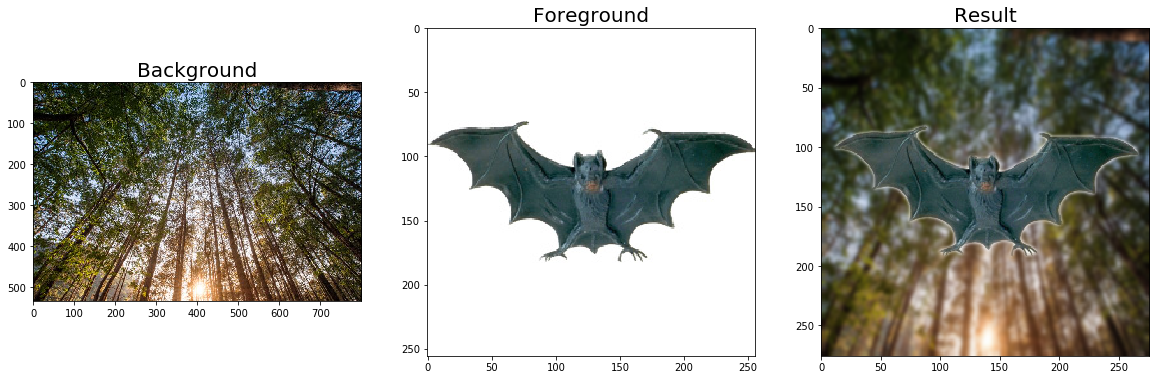

In [10]:
#FILE PATH
front_img = "front2/ABAT.jpg"
back_img = "backset/back2.jpg"
#READ IN IMAGE
front = cv.imread(front_img)
front= cv.copyMakeBorder(front,10,10,10,10,cv.BORDER_CONSTANT,value=WHITE)
back = cv.imread(back_img)
fcopy = io.imread(front_img)
bcopy = io.imread(back_img)
front, back, img = mask(front, back)
output = background_replacement(front, back, img)

plt.figure(figsize=(20,15))
plt.subplot(131), plt.imshow(bcopy)
plt.title('Background', size=20) 

plt.subplot(132), plt.imshow(fcopy)
plt.title('Foreground', size=20)

plt.subplot(133), plt.imshow(output)
plt.title('Result', size=20)
plt.show()

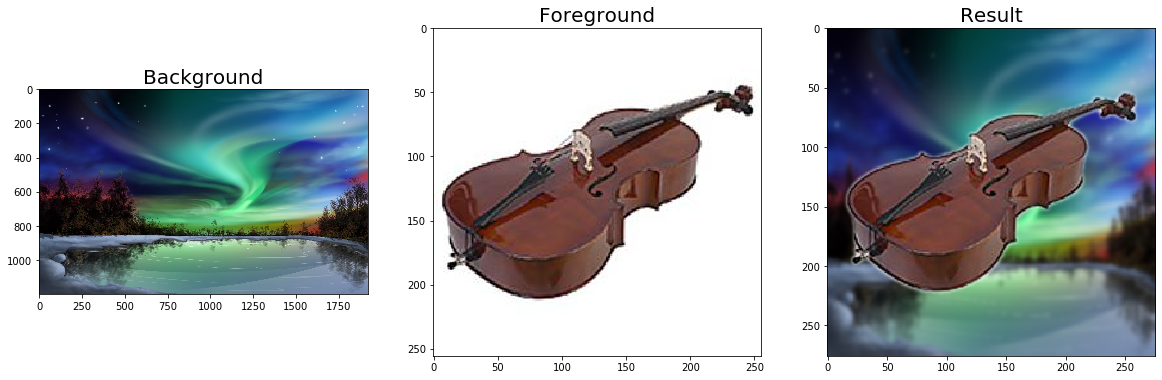

In [11]:
#FILE PATH
front_img = "front2/26394018.thl.jpg"
back_img = "backset/back3.jpg"
#READ IN IMAGE
front = cv.imread(front_img)
front= cv.copyMakeBorder(front,10,10,10,10,cv.BORDER_CONSTANT,value=WHITE)
back = cv.imread(back_img)
fcopy = io.imread(front_img)
bcopy = io.imread(back_img)
front, back, img = mask(front, back)
output = background_replacement(front, back, img)

plt.figure(figsize=(20,15))
plt.subplot(131), plt.imshow(bcopy)
plt.title('Background', size=20) 

plt.subplot(132), plt.imshow(fcopy)
plt.title('Foreground', size=20)

plt.subplot(133), plt.imshow(output)
plt.title('Result', size=20)
plt.show()

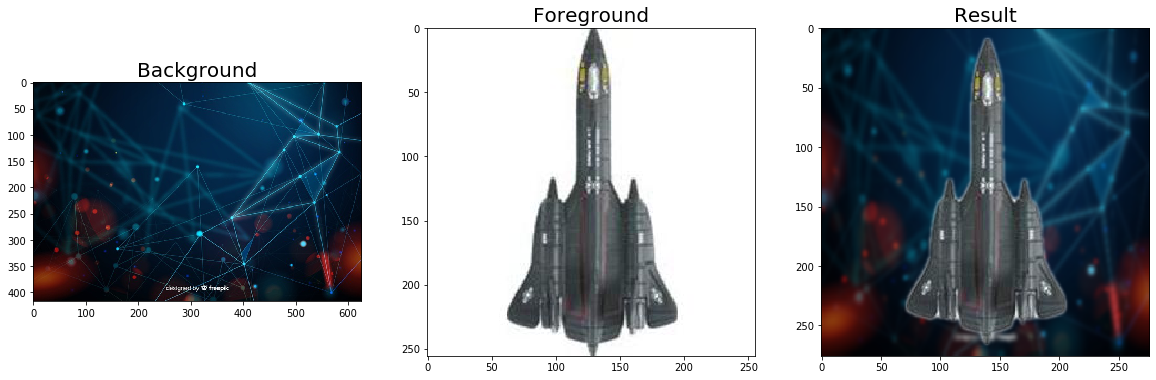

In [12]:
#FILE PATH
front_img = "front2/10049507.thl-1.jpg"
back_img = "backset/back4.jpg"
#READ IN IMAGE
front = cv.imread(front_img)
front= cv.copyMakeBorder(front,10,10,10,10,cv.BORDER_CONSTANT,value=WHITE)
back = cv.imread(back_img)
fcopy = io.imread(front_img)
bcopy = io.imread(back_img)
front, back, img = mask(front, back)
output = background_replacement(front, back, img)

plt.figure(figsize=(20,15))
plt.subplot(131), plt.imshow(bcopy)
plt.title('Background', size=20) 

plt.subplot(132), plt.imshow(fcopy)
plt.title('Foreground', size=20)

plt.subplot(133), plt.imshow(output)
plt.title('Result', size=20)
plt.show()

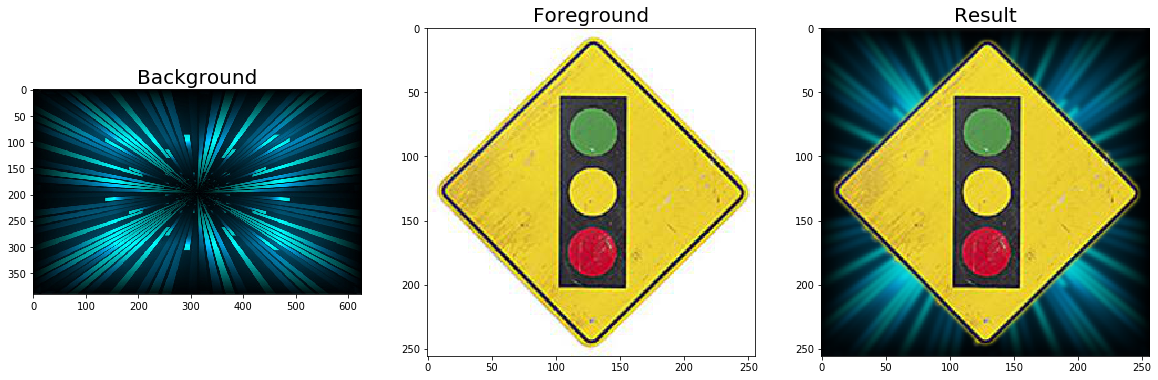

In [13]:
#FILE PATH
front_img = "front2/22849344.thl.jpg"
back_img = "backset/back10.jpg"
#READ IN IMAGE
front = cv.imread(front_img)
#front= cv.copyMakeBorder(front,10,10,10,10,cv.BORDER_CONSTANT,value=WHITE)
back = cv.imread(back_img)
fcopy = io.imread(front_img)
bcopy = io.imread(back_img)
front, back, img = mask(front, back)
output = background_replacement(front, back, img)

plt.figure(figsize=(20,15))
plt.subplot(131), plt.imshow(bcopy)
plt.title('Background', size=20) 

plt.subplot(132), plt.imshow(fcopy)
plt.title('Foreground', size=20)

plt.subplot(133), plt.imshow(output)
plt.title('Result', size=20)
plt.show()